Notebook realizzato da :  Agostino Fontana fontana.agostino@gmail.com cell.: 320 27 21 032 

L'obiettivo del progetto è quello di effettuare un analisi sulle series fornite dal provider  World Bank disponibile attraverso la piattaforma DBNomics. 




Note per l'utilizzatore :  qualora nel proprio ambiente non fosserò già installati il client DBNOMICS e librerie è neccessario eseguire le celle corrispondenti all'interno del notebook :
- Client dbnomics 
- Libreria requests
- Libreria pandas 
- Libreria matplotlib

In [2]:
# installare il client DBNOMICS qualora non fosse già installato nell'ambiente.
pip install dbnomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 245.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#installazione della libreria requestes per utilizzare il metodo GET 
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
#installazione della libreria pandas p
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
#installazione libreia matplotlib
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


si procede all'importazione di tutte le funzioni contenute nel MODULO_AGOSTINO_FONTANA 
* il file : client.py in teoria adesso non è più un semplice client... 


In [1]:
from Modulo_Agostino_Fontana.client import *

richiamo attraverso il metodo request il dataset
per impostare l'url corretto utilizzo lo Swagger di DBNomics :  https://api.db.nomics.world/v22/apidocs#/  dal quale si effettua il setting della chiamata 

In [2]:
df1= create_dataframe_by_calling_api()

{'_meta': {'args': {'limit': 125, 'offset': 0}, 'version': '22.1.15'}, 'datasets': {'docs': [{'code': 'commodity_prices', 'description': 'The World Bank’s Commodity Price historical data and forecasts are published quarterly, in January, April, July and October. The price forecasts go up to 2030.\nTopics: Agriculture & Rural Development', 'dimensions_codes_order': ['indicator', 'country'], 'dimensions_values_labels': {'country': {'1W': 'World'}, 'indicator': {'FALUMINUM': 'Aluminum, nominal, $/mt', 'FBANANA_US': 'Banana, US, nominal, $/kg', 'FBARLEY': 'Barley, nominal, $/mt', 'FBEEF': 'Beef, nominal, $/kg', 'FCHICKEN': 'Meat, chicken, nominal, $/kg', 'FCOAL_AUS': 'Coal, Australian, nominal, $/mt', 'FCOCOA': 'Cocoa, nominal, $/kg', 'FCOCONUT_OIL': 'Coconut oil, nominal, $/mt', 'FCOFFEE_ARABIC': 'Coffee, arabica, nominal, $/kg', 'FCOFFEE_ROBUS': 'Coffee, robusta, nominal, $/kg', 'FCOPPER': 'Copper, nominal, $/mt', 'FCOTTON_A_INDX': 'Cotton, nominal, $/kg', 'FCRUDE_PETRO': 'Crude oil, ave

ottenuto l'elenco di tutte le serie, i dati suggeriscono di scomporre la colonna Descrizione in almeno 3 colonne :  Descrizione della Serie, indicatore prezzo, unità di misura. 
Pertanto effettuo un split del dataframe, scomponendo la descrizione. L'obiettivo è ottenere una migliore visibilità del dataframe ed un ordinamento del Dataframe per "indicizzazione dei prezzi, unità di misura dei prezzi e descrizione. 


In [3]:
df2=split_dataframe_by_description(df1)

    index value Unit of measure              Description            Code
0       nominal            $/mt                 Aluminum       FALUMINUM
1       nominal            $/kg               Banana, US      FBANANA_US
2       nominal            $/mt                   Barley         FBARLEY
3       nominal            $/kg                     Beef           FBEEF
4       nominal            $/kg            Meat, chicken        FCHICKEN
..          ...             ...                      ...             ...
120        real            $/mt  Tobacco, US import u.v.      KFTOBAC_US
121        real            $/mt                      TSP           KFTSP
122        real            $/mt                     Urea  KFUREA_EE_BULK
123        real            $/mt            Wheat, US HRW  KFWHEAT_US_HRW
124        real            $/mt                     Zinc          KFZINC

[125 rows x 4 columns]


nella cella successiva l'operatore può effettuare un filtro per keyword sulla descrizione, in tal modo nella successiva cella potrà scegliere il numero di series da analizzare ed i corrispondenti indici relativi. 

In [4]:
df_filtered=filter_by_keyword(df2)

    index value Unit of measure                   Description           Code
21        index        2010=100  Edible oils & meals, nominal    FIFATS_OILS
84        index        2010=100     Edible oils & meals, real   KFIFATS_OILS
12      nominal           $/bbl            Crude oil, average   FCRUDE_PETRO
7       nominal            $/mt                   Coconut oil   FCOCONUT_OIL
16      nominal            $/mt                 Groundnut oil     FGRNUT_OIL
43      nominal            $/mt                      Palm oil      FPALM_OIL
54      nominal            $/mt                   Soybean oil   FSOYBEAN_OIL
75         real           $/bbl            Crude oil, average  KFCRUDE_PETRO
70         real            $/mt                   Coconut oil  KFCOCONUT_OIL
79         real            $/mt                 Groundnut oil    KFGRNUT_OIL
105        real            $/mt                      Palm oil     KFPALM_OIL
116        real            $/mt                   Soybean oil  KFSOYBEAN_OIL

Nella successiva iterazione si estraggono i codici relativi alle series da analizzare, necessari a rifare l'interrogazione al Dataset ed ottenere il nuovo Dataframe di lavoro. Pertanto IMPORTANTE : definire prima il numero delle serie da osservare, e poi successivamente inserire il corrispondente numero di riga. esempio : 
3 per le serie
101
100
102 
per il numero del codice

In [5]:
codes=extract_codes_to_analyze(df_filtered)

Hai inserito un valore non valido o il codice non è presente nel DataFrame.
75     KFCRUDE_PETRO
70     KFCOCONUT_OIL
79       KFGRNUT_OIL
105       KFPALM_OIL
116    KFSOYBEAN_OIL
Name: Code, dtype: object


L'array, series code, ottenuta precedentemente è necessaria per rieseguire l'interrogazione al provider ed ottenere il nuovo Dataframe da analizzare. 


In [6]:
df_work=create_dataframe_to_analyze(codes)

      Crude oil, average, real, $/bbl – World  \
1960                                 8.514978   
1961                                 8.045025   
1962                                 7.646138   
1963                                 7.686329   
1964                                 7.327570   
...                                       ...   
2026                                58.446121   
2027                                58.289894   
2028                                58.120434   
2029                                57.938168   
2030                                57.743549   

      Coconut oil, real, $/mt – World  Groundnut oil, real, $/mt – World  \
1960                      1631.602033                        1708.219418   
1961                      1298.562651                        1692.273524   
1962                      1263.708714                        1380.027261   
1963                      1467.234880                        1375.870044   
1964                      1498.

il dataframe ottenuto verrà adesso salvato all'interno della cartella Out del progetto

In [8]:
save_dataframe_to_csv(df_work)

il file DF_WORK.csv è stato salvato all'interno della cartella 'OUT' dello spazio di lavoro


nella cella successiva è possibile cambiare il percorso dove salvare il file

In [11]:
choosePath(df_work)

Hai inserito un percorso errato, riprova a lanciare il metodo o utilizzare il percorso di default visualizzato di seguito

Il file sarà memorizzato nel seguente percorso:
/Users/agostinofontana/Library/CloudStorage/GoogleDrive-fontana.agostino@gmail.com/Il mio Drive/Master_BigData_Unipa /01_Pyton/Progetto Finale


'/Users/agostinofontana/Library/CloudStorage/GoogleDrive-fontana.agostino@gmail.com/Il mio Drive/Master_BigData_Unipa /01_Pyton/Progetto Finale'

effettuo analisi sui dati ottenuti, 

In [9]:
analyze_dataframe(df_work)

       Crude oil, average, real, $/bbl – World  \
count                                71.000000   
mean                                 39.459214   
std                                  25.632526   
min                                   5.212236   
25%                                  19.241925   
50%                                  35.482468   
75%                                  58.368007   
max                                  95.297438   

       Coconut oil, real, $/mt – World  Groundnut oil, real, $/mt – World  \
count                        71.000000                          71.000000   
mean                       1147.403732                        1411.105974   
std                         446.732214                         374.986453   
min                         407.028436                         664.294190   
25%                         758.215539                        1170.806730   
50%                        1183.442540                        1430.374189   
75%       

In [10]:
correlation = df_work.corr()
print(correlation)

                                         Crude oil, average, real, $/bbl – World  \
Crude oil, average, real, $/bbl – World                                 1.000000   
Coconut oil, real, $/mt – World                                        -0.028465   
Groundnut oil, real, $/mt – World                                       0.167617   
Palm oil, real, $/mt – World                                           -0.166347   
Soybean oil, real, $/mt – World                                        -0.076195   

                                         Coconut oil, real, $/mt – World  \
Crude oil, average, real, $/bbl – World                        -0.028465   
Coconut oil, real, $/mt – World                                 1.000000   
Groundnut oil, real, $/mt – World                               0.681178   
Palm oil, real, $/mt – World                                    0.791585   
Soybean oil, real, $/mt – World                                 0.766754   

                                      

eseguo il grafico  delle series estratte 

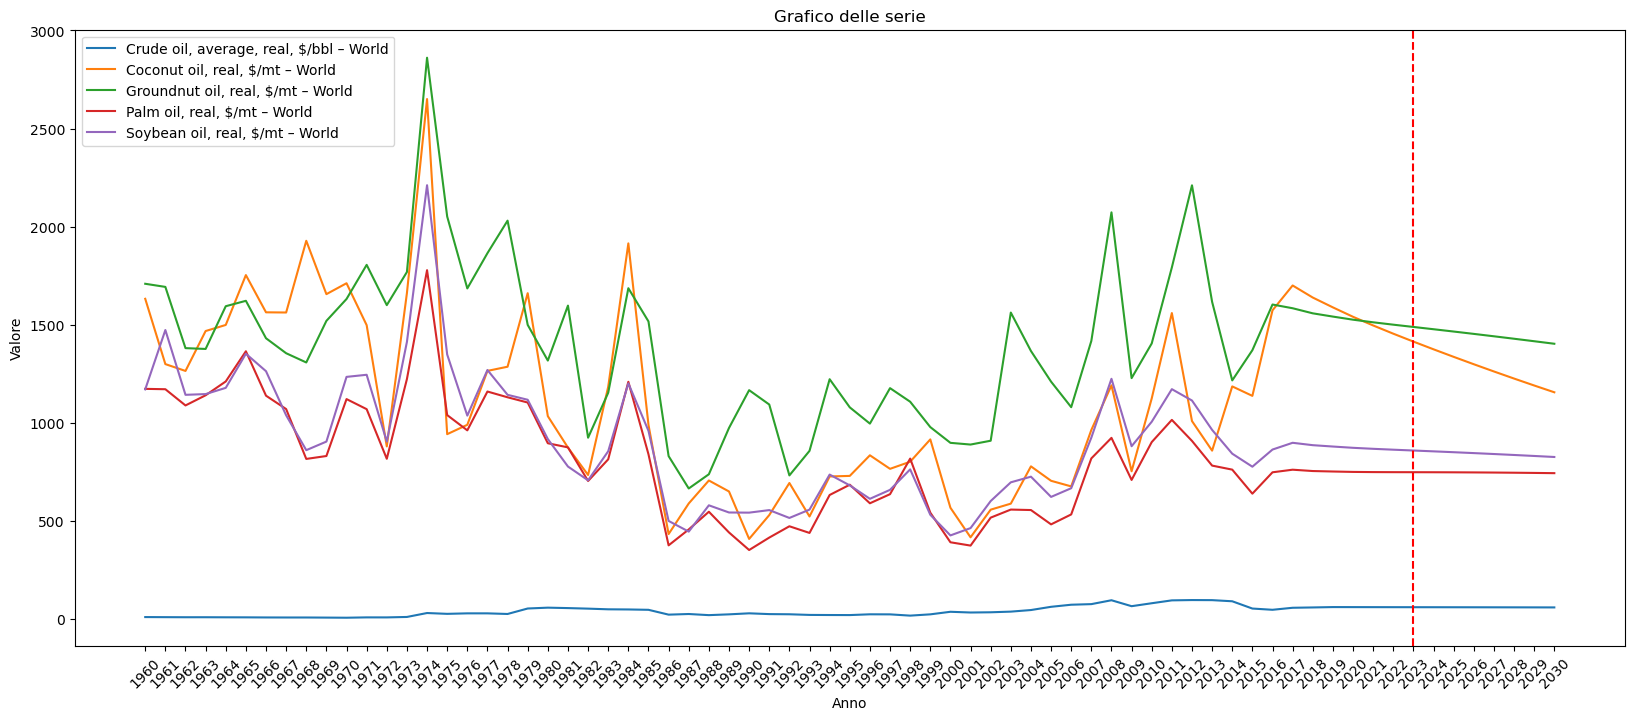

In [18]:
#eseguo la funzione plot dataframe 
plot_df(df_work)


def saveplot(grafico):


In [21]:

def saveplot(save_path):
    try:
        # Salvataggio del grafico nel percorso specificato
        plt.savefig(os.path.join(save_path, 'grafico.png'))
        
        print("Il grafico è stato salvato correttamente.")
    except Exception as e:
        print(f"Si è verificato un errore durante il salvataggio del grafico: {str(e)}")


In [24]:
def choosePath():
    try:
        path = os.getcwd()
        select = input("Digita il percorso dove memorizzare il file: ")
        if os.path.exists(select):
            print(f'Il file sarà memorizzato nel seguente percorso:\n{select}')
            return select
        else:
            print(f'Hai inserito un percorso errato, riprova a lanciare il metodo o utilizzare il percorso di default visualizzato di seguito\n')        
        print(f'Il file sarà memorizzato nel seguente percorso:\n{path}')      
        return path
    except Exception as e:
        return str(e)

# Chiamata al metodo choosePath per ottenere il percorso desiderato
save_path = choosePath()

# Salvataggio del grafico nel percorso scelto dall'utente
plt.savefig(os.path.join(save_path, 'grafico.png'))

Il file sarà memorizzato nel seguente percorso:
out


<Figure size 640x480 with 0 Axes>

In [10]:
#salvare il grafico ottenuto

plt.savefig('grafico.png')


<Figure size 640x480 with 0 Axes>

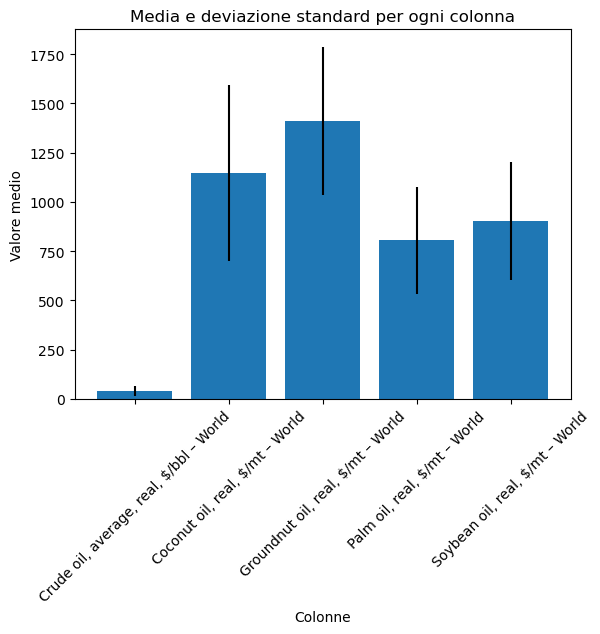

In [23]:
import matplotlib.pyplot as plt

# Calcola la descrizione statistica del DataFrame
df_desc = df_work.describe()

# Crea il grafico a barre
plt.bar(df_desc.columns, df_desc.loc['mean'], yerr=df_desc.loc['std'])
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.ylabel('Valore medio')
plt.title('Media e deviazione standard per ogni colonna')

# Mostra il grafico
plt.show()
